<a href="https://colab.research.google.com/github/nguyenhungquang/Final-examination-NLP/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install pyvi

In [0]:
import codecs
import re
import string
from sklearn.svm import SVC,LinearSVC
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from pyvi import ViTokenizer,ViPosTagger
from sklearn.ensemble import RandomForestClassifier
import gensim.models.keyedvectors as word2vec
import gensim.models as w2v
from collections import defaultdict
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [0]:
filePath = "drive/My Drive/lastterm/student_manual.train.txt"
"""
path_nag = 'drive/My Drive/sentiment_dicts/nag.txt'
path_pos = 'drive/My Drive/sentiment_dicts/pos.txt'
path_not = 'drive/My Drive/sentiment_dicts/not.txt'

with codecs.open(path_nag, 'r', encoding='UTF-8') as f:
    nag = f.readlines()
nag_list = [n.replace('\n', '') for n in nag]

with codecs.open(path_pos, 'r', encoding='UTF-8') as f:
    pos = f.readlines()
pos_list = [n.replace('\n', '') for n in pos]
with codecs.open(path_not, 'r', encoding='UTF-8') as f:
    not_ = f.readlines()
not_list = [n.replace('\n', '') for n in not_]
"""

"\npath_nag = 'drive/My Drive/sentiment_dicts/nag.txt'\npath_pos = 'drive/My Drive/sentiment_dicts/pos.txt'\npath_not = 'drive/My Drive/sentiment_dicts/not.txt'\n\nwith codecs.open(path_nag, 'r', encoding='UTF-8') as f:\n    nag = f.readlines()\nnag_list = [n.replace('\n', '') for n in nag]\n\nwith codecs.open(path_pos, 'r', encoding='UTF-8') as f:\n    pos = f.readlines()\npos_list = [n.replace('\n', '') for n in pos]\nwith codecs.open(path_not, 'r', encoding='UTF-8') as f:\n    not_ = f.readlines()\nnot_list = [n.replace('\n', '') for n in not_]\n"

In [0]:
def normalise(text):
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)
    specialwords=['XL','XXL','L','M']
    toLower = lambda x: " ".join( a if a in specialwords else a.lower() for a in x.split() )
    text = toLower(text)
    replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'a`':'à',"a'":'á','a~':'ã',' k ':' không ',' ko ':' không ','ag':'ang','àg':'àng','ág':'áng','ảg':'ảng',
        'ạg':'ạng','ăg':'ăng','ắg':'ắng','ằg':'ằng','ẳg':'ẳng','ẵg':'ẵng','ặg':'ặng','âg':'âng','ấg':'ấng',
        'ô kê':'ok','ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ','okey': ' ok ', 'ôkê': ' ok ',
        'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ', ' vs ': u' với ', 'wa': ' quá ',
        'wá': u' quá', 'j': u' gì ', '“': ' ', u' đx ': u' được ','dk': u' được ', 'dc': u' được ',
        'đk': u' được ','đc': u' được ',' sp ':' sản phẩm ',"👹": "negative", "👻": "positive", "💃": "positive",'🤙': ' positive ', '👍': ' positive ',
        "💄": "positive", "💎": "positive", "💩": "positive","😕": "negative", "😱": "negative", "😸": "positive",
        "😾": "negative", "🚫": "negative",  "🤬": "negative","🧚": "positive", "🧡": "posnnitive",'🐶':' positive ',
        '👎': ' negative ', '😣': ' negative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ',
        '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
        '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' negative ', '😢': ' negative ',
        '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' negative ', '😊': ' positive ',
        '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' negative ', '😭': ' negative ',
        '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
        '^^': ' positive ', '😨': ' negative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
        '😖': ' negative ', '😀': ' positive ', ':((': ' negative ', '😡': ' negative ', '😠': ' negative ',
        '😒': ' negative ', '🙂': ' positive ', '😏': ' negative ', '😝': ' positive ', '😄': ' positive ',
        '😙': ' positive ', '😤': ' negative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
        '✌': ' positive ', '💕': ' positive ', '😞': ' negative ', '😓': ' negative ', '️🆗️': ' positive ',
        '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=))': '  positive ', '😋': ' positive ',
        '💓': ' positive ', '😐': ' negative ', ':3': ' positive ', '😫': ' negative ', '😥': ' negative ',
        '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
        '😗': ' positive ', '🤔': ' negative ', '😑': ' negative ', '🔥': ' negative ', '🙏': ' negative ',
        '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
        '😚': ' positive ', '❌': ' negative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
        '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
        '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
        '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
        '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
        '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' negative ',  '💀': ' negative ',
        '😔': ' negative ', '😧': ' negative ', '😩': ' negative ', '😰': ' negative ', '😳': ' negative ',
        '😵': ' negative ', '😶': ' negative ', '🙁': ' negative ',
    }
    for k, v in replace_list.items():
        text = text.replace(k, v)
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)
    #text = ViTokenizer.tokenize(text)
    #text=subtitute(text)
    text=POStagging(text)
    text = text.replace(u'"', u' ')
    text = text.replace(u'️', u'')
    text = text.replace('🏻','')
    return text
def subtitute(text):
    texts = text.split()
    len_text = len(texts)
    texts = [t.replace('_', ' ') for t in texts]
    for i in range(len_text):
        cp_text = texts[i]
        if cp_text in not_list: 
            numb_word = 2 if len_text - i - 1 >= 4 else len_text - i - 1
            for j in range(numb_word):
                if texts[i + j + 1] in pos_list:
                    texts[i] = 'notpos'
                    texts[i + j + 1] = ''
                if texts[i + j + 1] in nag_list:
                    texts[i] = 'notnag'
                    texts[i + j + 1] = ''
        else: 
            if cp_text in pos_list:
                texts.append('positive')
            elif cp_text in nag_list:
                texts.append('negative')
    text = u' '.join(texts)
    return text
def readFile(path,labelFilePath=''):
    data={}
    with codecs.open(path,'r','utf-8') as f:
        dataArray=f.readlines()
        dataArray=[x.strip() for x in dataArray]
        lineArray=[dataArray[i] for i in range(len(dataArray)) if (i%2==0)]
        labelArray=[dataArray[i][4] for i in range(len(dataArray)) if (i%2==1)]
    if labelFilePath!='':
        with codecs.open(path,'r','utf-8') as f:
            dataArray=f.readlines()
            lineArray=[x.strip() for x in dataArray]
        with codecs.open(labelFilePath,'r','utf-8') as f:
            dataArray=f.readlines()
            labelArray=[x.strip() for x in dataArray]
    textArray=[normalise(x) for x in lineArray]
    """
    for i in range(len(lineArray)):
        if labelArray[i]=='2':
            labelArray[i]='1'
        if labelArray[i]=='4':
            labelArray[i]='5'
    """
    print(len(textArray))
    return formatTable(textArray,labelArray,len(lineArray))
def formatTable(lineArray,labelArray,size):
    f=np.memmap("data.dat",dtype=object,mode='w+',shape=(2,size))
    f[0]=lineArray[:size]
    f[1]=labelArray[:size]
    f=f.T
    print (len(f))
    dfTable=pd.DataFrame(f)
    del f
    dfTable.columns=['text','label']
    return dfTable
def POStagging(text):
    a=ViPosTagger.postagging(ViTokenizer.tokenize(text))
    sent=''
    for i in range(len(a[1])):
        sent+=a[0][i]+'_'+a[1][i]+' '
    return sent

In [0]:
trainingTable=readFile(filePath)
totalText=trainingTable['text']
totalLabel=trainingTable['label']
print (totalText[16],totalLabel[16])
xTrain, xTest, yTrain, yTest = train_test_split(totalText, totalLabel, test_size = 0.3, random_state = 0)

31460
31460
chất_lượng_N sản_phẩm_N chưa_R thật_sự_A đẹp_A nhe_V shop_N  4


In [0]:
classWeight={'1':1,'2':1.2,'3':1.4,'4':1.2,'5':1}
classifier=[MultinomialNB(alpha=0.001),
            SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None),
            SVC(kernel='linear', C=0.2175, class_weight=None, verbose=True),
            LinearSVC(random_state=0, loss='hinge',tol=1e-5,class_weight=classWeight),
            RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]
tfidfVect = TfidfVectorizer(analyzer='char', ngram_range=(1,5))
#w2vec=TfidfEmbeddingVectorizer(w2vdic)
text_clf = Pipeline([('tfidf', tfidfVect),
                    ('clf', classifier[3]),
                    ])
text_clf.fit(xTrain,yTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 5), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0,
                           class_weight={'1': 1, '2': 1.2, '3': 1.4, '4': 1.2,
                                  

In [0]:
"""
pathTextTest="drive/My Drive/"
pathLabelTest="drive/My Drive/"
fileTestTable=readFile(fileTest,labelFilePath=pathLabelTest)
fileTextTest=fileTestTable['text']#mảng text để test nếu đọc từ file
fileLabelTest=fileTestTable['label']#mảng label để test nếu đọc từ file
"""
predictions=text_clf.predict(xTest)
print('Macro f1 score ',f1_score(yTest,predictions,average='macro'))
print('Micro f1 score ',f1_score(yTest,predictions,average='micro'))
print('Weighted f1 score ',f1_score(yTest,predictions,average='weighted'))
print('Accuracy score ', accuracy_score(yTest,predictions))


Macro f1 score  0.45551160617604475
Micro f1 score  0.5674931129476584
Weighted f1 score  0.5309039801074942
Accuracy score  0.5674931129476584


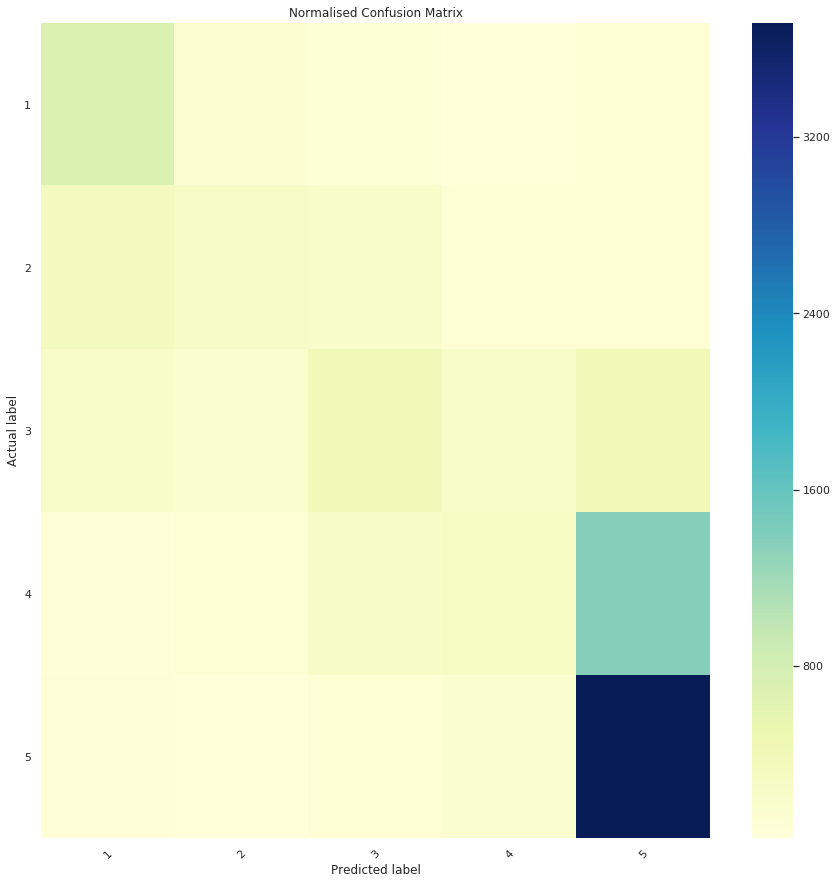

In [0]:
allLabel=['1','2','3','4','5']
plt.figure(figsize=(15,15))
cm = confusion_matrix(yTest, predictions)
#cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)
ax = sns.heatmap(cm,cmap='YlGnBu')#, annot = True, fmt = ".2f")
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
ax.set_title('Normalised Confusion Matrix')
ax.set_xticklabels(allLabel,rotation=45)
ax.set_yticklabels(allLabel,rotation=0)
plt.show()

In [0]:
def predict(text):
    text=normalise(text)
    predictLabel=text_clf.predict([text])
    print('Predict label ',predictLabel)
predict('giá bình thường <3')

Predict label  ['3']


In [0]:
def cnt(arr):
    a1=0
    a2=0
    a3=0
    a4=0
    a5=0
    for x in arr:
        if x=='1':
            a1+=1
        if x=='2':
            a2+=1
        if x=='3':
            a3+=1
        if x=='4':
            a4+=1
        if x=='5':
            a5+=1
    print(a1,a2,a3,a4,a5)
cnt(yTest)
cnt(predictions)

1031 927 1418 2023 4039
1170 608 1341 977 5342


In [0]:
for x,y1,y2 in zip(xTest,predictions,yTest):
    if(y1!=y2 and abs(int(y1)-int(y2))>1):
        print(x,y1,y2)

biết_V v_N đặt_V hai_M cái_Nc lun_N  5 3
positive_N positive_V positive_N  5 1
áo_N vừa_R ngắn_A vừa_R bó_V nghĩ_V sao_P áo_N vầy_N gọi_V là_C áo_cánh_N dơi_N  5 1
rất_R đáng_V tiền_N chất_lượng_N sản_phẩm_N tuyệt_vời_A nhưng_C đóng_gói_V hàng_N tệ_A quá_R áo_N nhăn_A như_C nùi_N giẻ_N  1 3
tôi_P đã_R nhân_V được_R hàng_N nhưng_C không_R đúng_A mẫu_N tôi_P đặt_V trong_E hình_N  5 3
nói_chung_X thì_C với_E giá_N đó_P là_V ok_N rồi_C mng_V positive_N  5 3
tiền_N nào_P của_E đấy_P vậy_P là_V được_V rồi_R  3 5
chất_liệu_N vải_N mỏng_A hơn_R so_V với_E lần_N đầu_tiên_A đặt_V  3 1
chất_lượng_N sản_phẩm_N tạm_A được_V thời_gian_N giao_V hàng_N chậm_A  3 5
áo_N cỡ_N nhỏ_A quá_R ko_A mặc_V vừa_R  3 1
hàng_N xuất_V nên_C rộng_A lắm_R  5 3
lắm_R nhé_A  5 3
áo_N bị_V lỗi_N 1_M bên_N tay_N mình_P tay_N nhỏ_A mà_C còn_R chật_vật_A để_E chui_V vào_E shop_N nhớ_V kiểm_tra_V trc_N khi_N gửi_V hành_V nhé_N  1 5
that_N vong_V kinh_N khung_N  3 1
mình_P cao_A 1m68_M mà_C mặc_V không_R bị_V ngắn_A  3 5
áo_